## subplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

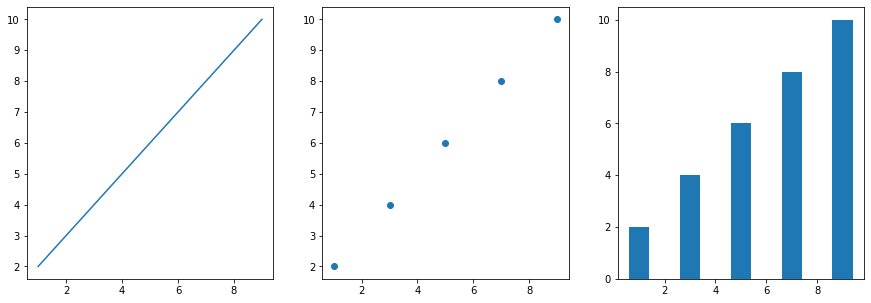

In [8]:
plt.figure(figsize=(15,5))
x = [1,3,5,7,9]
y = [2,4,6,8,10]

plt.subplot(131)
plt.plot(x,y)

plt.subplot(132)
plt.scatter(x,y)

plt.subplot(133)
plt.bar(x,y)

plt.show()

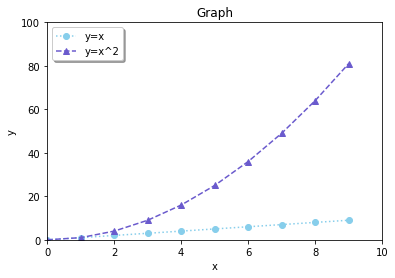

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def main():
    
    x = np.arange(10)

    # 초기 figure와 축을 설정
    fig, ax = plt.subplots()
    
    # y = x 그래프
  
    ax.plot(x, x, label='y=x', marker='o', color='skyblue', linestyle=':')
    ax.plot(x, x**2, label='y=x^2', marker='^', color='slateblue', linestyle='--')
    
    ax.set_title('Graph')
    
    # x label: 'x', y label: 'y'로 설정합니다.
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # x 범위는 0부터 10까지, y 범위는 0부터 100까지
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 100)
    
    # 범례의 위치: 'upper left'로 하고, 그림자 효과: True, 테두리는 둥글게 : True
    ax.legend(loc ='upper left', shadow=True, fancybox=True)
    
    # figure를 "plot.png"라는 이름으로 저장
    fig.savefig('plot.png')
    
if __name__ == "__main__":
    main()

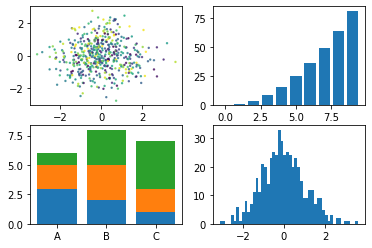

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import csv


def main():
    
    data_x = []
    data_y = []
    
    with open('data.csv', newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            data_x.append(float(row[0]))
            data_y.append(float(row[1]))
    
    # 2x2개의 그래프를 그릴 수 있는 초기 figure와 축을 설정
    fig, axes = plt.subplots(2,2)
    
    """
    Scatter 그래프 그리기
    """
    
    colors = np.random.randint(0,100,500)
    
    # figure의 (0,0) 위치에 scatter 그래프를 그립니다.
    # x 데이터 : data_x / y 데이터 : data_y, point color : colors, size : 2, 투명도 : 0.7    
    axes[0,0].scatter(data_x, data_y, c=colors, s=2, alpha=0.7)
    
    """
    Bar 그래프 그리기
    """
    
    bar_x = np.arange(10)
    
    # figure의 (0,1) 위치, Bar 그래프
    # x 데이터 : bar_x / y 데이터 : bar_x**2
    axes[0,1].bar(bar_x, bar_x**2)
    
    """
    Multi-Bar 그래프 그리기
    """
    
    x = np.array([3,2,1])
    y = np.array([2,3,2])
    z = np.array([1,3,4])
    data1 =  [x, y, z]

    x_ax =  np.arange(3)
    
    for i in x_ax:
        # figure의 (1,0) 위치, Bar 그래프
        # x 데이터 : x_ax / y 데이터 : 각각 x,y,z로 설정 => data1
        axes[1,0].bar(x_ax, data1[i], bottom=np.sum(data1[:i], axis=0))
        
    # figure의 (1,0) 위치에서 x축 데이터 - 병렬적으로 설정
    axes[1,0].set_xticks(x_ax)
    # figure의 (1,0) 위치에서 x축 label :'A', 'B', 'C'로 설정
    axes[1,0].set_xticklabels(['A','B','C'])
    
    """
    Histogram 그래프 그리기
    """
    
    data = np.array(data_x)
    
    # figure의 (1,1) 위치, Histogram 그래프
    # 입력될 데이터는 data, Histogram 표현시 분할되는 개수는 50으로 설정
    axes[1,1].hist(data, bins=50)


if __name__ == '__main__':
    main()

## regplot()

* regplot() : 데이터 산점도를 출력 및 분포를 근사하는 선도 함께 출력
* regplot(x, y, color, line_kws, scatter_kws) 함수의 파라미터:
* x : x축에 해당되는 데이터
* y : y축에 해당되는 데이터
* color : 색상을 설정
* line_kws : 근사선의 특성 설정 (Python Dictionary 형태)
* scatter_kws : 데이터 점들의 특성 설정 (딕셔너리 형태) -> 산점도!
* 그림자 : 분포도를 의미 ((그림자가 넓게 퍼져있다면 산점도 또한 넓게 퍼져있음))

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [13]:
# seaborn의 load_dataset을 사용하여 tips (팁 가격) 데이터 불러오기
df = sns.load_dataset('tips') 

### 방법 1

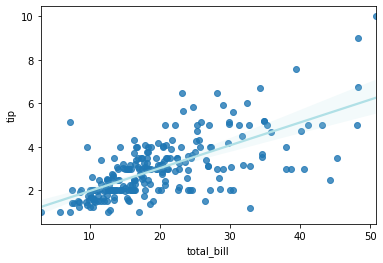

In [23]:
# x축에 해당되는 데이터로 total_bill series를 x_data으로 저장 
x_data = df.total_bill
# y축에 해당되는 데이터로 tip series를 y_data으로 저장 
y_data = df.tip

# regplot함수의 출력물을 sns_plot으로 저장
# line의 색은 powderblue로 설정
sns_plot = sns.regplot(x_data, y_data, line_kws={'color':'powderblue'})

### 방법 2

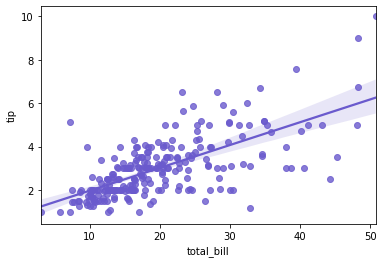

In [21]:
sns.regplot(x=df["total_bill"], y=df["tip"],color='slateblue')
plt.show()

#### line_kws 파라미터를 설정하여 근사선의 속성만 변경

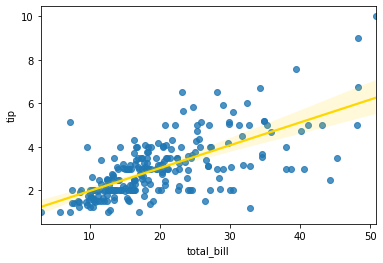

In [28]:
sns.regplot(x=df["total_bill"], y=df["tip"],line_kws= {'color':'gold'})
plt.show()

#### line_kws 파라미터를 설정하여 근사선의 속성만 변경

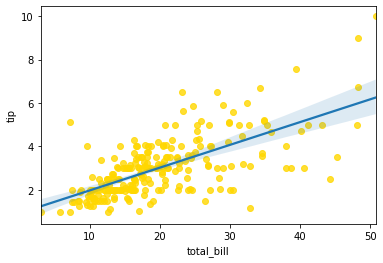

In [30]:
sns.regplot(x=df["total_bill"], y=df["tip"],scatter_kws= {'color':'gold'})
plt.show()

---

In [17]:
# ignore
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

##  countplot & jointplot

countplot() : 도수 분포를 나타내는 , 그리고 산점도와 도수 분포를 모두 나타내는 jointplot() 함수

countplot과 jointplot을 활용하기 위한 함수/라이브러리

> countplot('x', 'y', data)
* : 데이터 명에 해당하는 각 카테고리 값 별 빈도수를 표시하는 막대 그래프를 출력
* 'x': x 축의 데이터로 열 이름 입력
* 'y': y 축의 데이터로 행 이름 입력
* data: 시각화를 위한 데이터(Pandas DataFrame 형)

---

> jointplot('x_axis', 'y_axis', data, kind)
* : 데이터 산점도와 히스토그램을 함께 출력
* 'x_axis' : 열 이름
* 'y_axis' : 행 이름
* data : 시각화를 위한 데이터(Pandas DataFrame 형)
* kind : 차트 종류 (기본은 scatter)

In [48]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


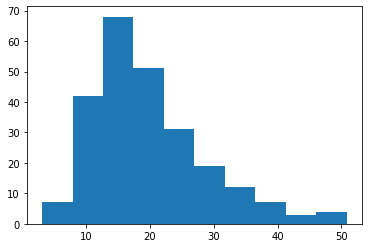

In [61]:
plt.hist(df.total_bill)
plt.show()

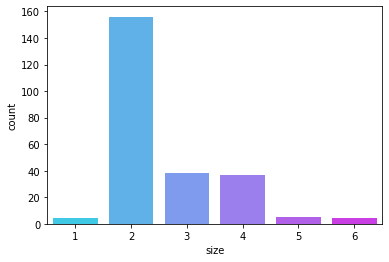

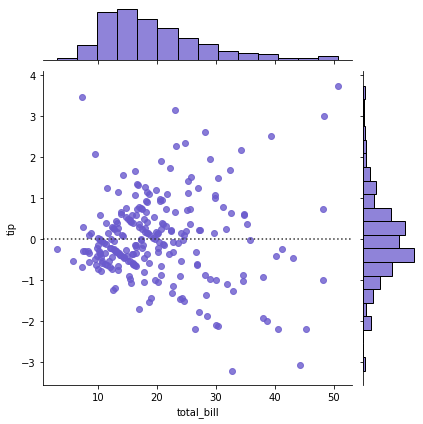

In [66]:
# countplot함수의 출력물을 sns_plot_size으로 저장
# "size" 데이터에 해당하는 자료를 x축으로 출력
sns_plot_size = sns.countplot(df['size'], palette='cool')

# jointplot함수의 출력물을 g로 저장
# "total_bill"을 x축, "tip"을 y축, "resid" 형태 그래프로 설정 
g = sns.jointplot(x='total_bill', y='tip', data=df, kind='resid',color='slateblue')
plt.show()

> kind 종류 https://seaborn.pydata.org/generated/seaborn.jointplot.html
* scatter
* kde
* hist
* hex
* reg
* resid

#### reg => (regression + scatter) : 근사선

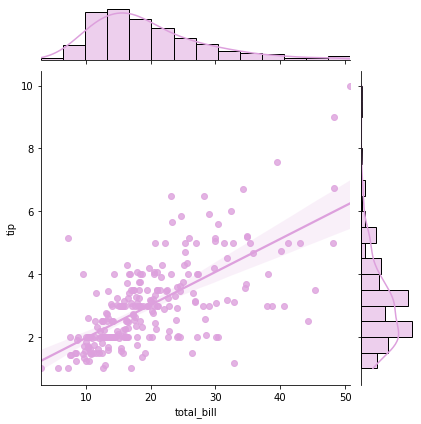

In [70]:
g = sns.jointplot(x='total_bill', y='tip', data=df, kind='reg',color='plum') # regplot
#g.savefig("plot.png")
plt.show()